## Практическое задание 6. Градиентный бустинг ~~своими руками~~

Поздравляю! Это финальное упражнение в нашем курсе. Проявите все своё старание, терпение и опыт, чтобы выполнить его.  
Теперь вы многое знаете из машинного обучения и для вас не составит сложности попробовать разные алгоритмы, новые библиотеки и применить их к реальной задаче.

__Задание 1. (0.5 балла)__

Мы будем использовать данные соревнования [Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data).  

* Загрузите таблицу **application_train.csv**;
* Запишите в Y столбец с целевой переменной;
* Удалите ненужные столбцы (для этого воспользуйтесь описанием);
* Определите тип столбцов и заполните пропуски - стратегия произвольная;
* Разбейте выборку в соотношении 70:30 с random_state=0.

Так как в данных значительный дисбаланс классов, в качестве метрики качества везде будем использовать площадь под precision-recall кривой.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

In [54]:
app_tr = pd.read_csv('application_train.csv')

In [3]:
app_tr.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
app_tr.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [ ]:
set(app_tr.dtypes.array)

{dtype('int64'), dtype('float64'), dtype('O')}

In [55]:
for column in app_tr:
    if app_tr[column].dtype == object:
        app_tr[column] = app_tr[column].fillna('')
    elif app_tr[column].dtype == int:
        app_tr[column] = app_tr[column].fillna(0)
    else:
        app_tr[column] = app_tr[column].fillna(0.)

In [ ]:
app_tr.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
Y = app_tr['TARGET']
app_tr2 = app_tr.drop(columns = ['TARGET', 'SK_ID_CURR'])

In [61]:
X = app_tr2.loc[:, app_tr2.dtypes != object]
num_columns = X.columns

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

__Задание 2. (1.5 балла)__

Также мы будем использовать две реализации градиентного бустинга: [LightGBM](https://lightgbm.readthedocs.io/en/stable/Python-API.html) и [Catboost](https://catboost.ai/en/docs/), которые вам необходимо самостоятельно изучить и установить, используя команды:  
`!pip install lightgb`  
`!pip install catboost`  
Обучите реализации градиентного бустинга LightGBM и Catboost на вещественных признаках без подбора параметров.
Почему получилась заметная разница в качестве?

В этом и последующих экспериментах необходимо измерять время обучения моделей.

In [9]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import average_precision_score
from time import time
import time

In [ ]:
lgbm_model = LGBMClassifier(verbose=-1)
start = time.time()
lgbm_model.fit(x_train, y_train)
finish = time.time()
y_lgbm = lgbm_model.predict_proba(x_test)[:, 1]
print(f"lgbm classifier score:' {average_precision_score(y_test, y_lgbm)}, time:  {finish - start}")

lgbm classifier score:' 0.23159230793933594, time:  8.305196523666382


In [ ]:
cat_model = CatBoostClassifier()
t0 = time.time()
cat_model.fit(x_train, y_train, verbose=False)
t1 = time.time()
y_cat = cat_model.predict_proba(x_test)[:, 1]
print('catboost classifier score:', average_precision_score(y_test, y_cat), 'time:' , t1-t0)

catboost classifier score: 0.23372360315874663 time: 113.8621654510498


__Задание 3. (2 балла)__

Подберите с CV=3 оптимальные параметры алгоритмов, изменяя:

* глубину деревьев;
* количество деревьев;
* темп обучения;
* оптимизируемый функционал.

Проанализируйте соотношения глубины и количества деревьев в зависимости от алгоритма.

### CatBoost

In [13]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'max_depth': [2, 5, 8],
    'n_estimators':[10, 100, 1000],
    'objective': ['Logloss'],
    'learning_rate': [0.001, 0.01, 0.1]
}

cat_model = CatBoostClassifier(verbose = False)
gs = GridSearchCV(cat_model, cv=3, param_grid=params, scoring='average_precision', verbose=0)

t0 = time.time()
gs.fit(x_train, y_train)
t1 = time.time()

y_gs = gs.predict_proba(x_test)[:, 1]

print(f"Best parametrs: {gs.best_params_}, \nCatB  classifier score: {average_precision_score(y_test, y_gs)}, \nTime: {t1-t0}")

Best parametrs: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000, 'objective': 'Logloss'}, 
CatB  classifier score: 0.23160467880009492, 
Time: 3018.767742395401


In [ ]:
cat_model = CatBoostClassifier(depth = 2, iterations = 1000, learning_rate = 0.1,
                               loss_function = 'Logloss', verbose=False)

t0 = time.time()
cat_model.fit(x_train, y_train)
t1 = time.time()
y_cat = cat_model.predict_proba(x_test)[:, 1]

print(f"CatB  classifier score: {average_precision_score(y_test, y_cat)}, \nTime: {t1-t0}")

CatB  classifier score: 0.23160467880009492, 
Time: 75.55011487007141


### LGBM

In [ ]:
params = {
    'max_depth': [2, 5, 8],
    'n_estimators':[100, 1000, 1500],
    'objective': ['binary'],
    'learning_rate': [0.001, 0.01, 0.1]
}

lgbm_model = LGBMClassifier(force_row_wise=True, verbose = -1)
gs = GridSearchCV(lgbm_model, cv=3, param_grid=params, scoring='average_precision', verbose=0)

t0 = time.time()
gs.fit(x_train, y_train)
t1 = time.time()

y_gs = gs.predict_proba(x_test)[:, 1]

print(f"Best parametrs: {gs.best_params_}, \nLgbm  classifier score: {average_precision_score(y_test, y_gs)}, \nTime: {t1-t0}")

Best parametrs: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 1000, 'objective': 'binary'}, 
Lgbm  classifier score: 0.2334494228307752, 
Time: 2628.1468703746796


In [ ]:
lgbm_model = LGBMClassifier(learning_rate = 0.1, max_depth = 2,
                            n_estimators = 1000, objective = 'binary',
                            force_row_wise=True, verbose = -1)

t0 = time.time()
lgbm_model.fit(x_train, y_train)
t1 = time.time()

y_lgbm = lgbm_model.predict_proba(x_test)[:, 1]

print(f"Lgbm  classifier score: {average_precision_score(y_test, y_lgbm)}, \nTime: {t1-t0}")

Lgbm  classifier score: 0.2334494228307752, 
Time: 31.85992121696472


__Задание 4. (3.5 балла)__

Добавьте категориальные признаки к вещественным следующими способами:

* как OHE признаки;
* как счетчики со сглаживанием.

При подсчете счетчиков запрещается использование циклов.

На получившихся датасетах подберите параметры у каждого из алгоритмов. Как меняется время, необходимое для обучения модели в зависимости от способа кодирования? Сравните полученные результаты с встроенными методами обработки категориальных признаков.

### как OHE признаки

In [10]:
one_hot_X = pd.get_dummies(app_tr2, drop_first=True)

In [11]:
x_train_ohe, x_test_ohe, y_train_ohe, y_test_ohe = train_test_split(np.array(one_hot_X), Y, test_size=0.3, random_state=0)

CatBoost

In [14]:
params = {
    'depth': [2, 5, 8],
    'iterations':[10, 100, 1000],
    'loss_function': ['Logloss'],
    'learning_rate': [0.001, 0.01, 0.1]
}

cat_model = CatBoostClassifier(verbose = False)
gs = GridSearchCV(cat_model, cv=3, param_grid=params, scoring='average_precision', verbose=0)

t0 = time.time()
gs.fit(x_train_ohe, y_train_ohe)
t1 = time.time()

y_gs = gs.predict_proba(x_test_ohe)[:, 1]

print(f"Best parametrs: {gs.best_params_}, \nCatB  classifier score: {average_precision_score(y_test_ohe, y_gs)}, \nTime: {t1-t0}")

Best parametrs: {'depth': 5, 'iterations': 1000, 'learning_rate': 0.01, 'loss_function': 'Logloss'}, 
CatB  classifier score: 0.2044191000100468, 
Time: 361.9231266975403


In [19]:
cat_model = CatBoostClassifier(depth = 5, iterations = 1000, learning_rate = 0.01,
                               loss_function = 'Logloss', verbose=False)

t0 = time.time()
cat_model.fit(x_train_ohe, y_train_ohe)
t1 = time.time()
y_cat = cat_model.predict_proba(x_test_ohe)[:, 1]

print(f"CatB  classifier score: {average_precision_score(y_test_ohe, y_cat)}, \nTime: {t1-t0}")

CatB  classifier score: 0.2044191000100468, 
Time: 5.980013370513916


LightGBM

In [15]:
params = {
    'max_depth': [2, 5, 8],
    'n_estimators':[100, 1000, 1500],
    'objective': ['binary'],
    'learning_rate': [0.001, 0.01, 0.1]
}

lgbm_model = LGBMClassifier(force_row_wise=True, verbose = -1)
gs = GridSearchCV(lgbm_model, cv=3, param_grid=params, scoring='average_precision', verbose=0)

t0 = time.time()
gs.fit(x_train_ohe, y_train_ohe)
t1 = time.time()

y_gs = gs.predict_proba(x_test_ohe)[:, 1]

print(f"Best parametrs: {gs.best_params_}, \nLgbm  classifier score: {average_precision_score(y_test_ohe, y_gs)}, \nTime: {t1-t0}")

Best parametrs: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1500, 'objective': 'binary'}, 
Lgbm  classifier score: 0.20302648138251986, 
Time: 100.45382475852966


In [20]:
lgbm_model = LGBMClassifier(learning_rate = 0.01, max_depth = 2,
                            n_estimators = 1500, objective = 'binary',
                            force_row_wise=True, verbose = -1)

t0 = time.time()
lgbm_model.fit(x_train_ohe, y_train_ohe)
t1 = time.time()

y_lgbm = lgbm_model.predict_proba(x_test_ohe)[:, 1]

print(f"Lgbm  classifier score: {average_precision_score(y_test_ohe, y_lgbm)}, \nTime: {t1-t0}")

Lgbm  classifier score: 0.20302648138251986, 
Time: 0.8440930843353271


### как счетчики со сглаживанием - mean_target_encoding


In [21]:
app_tr3 = app_tr.drop(columns = ['SK_ID_CURR'])
mte_X = app_tr3.copy()
C = 100
for column in app_tr3:
    if(app_tr3[column].dtypes == object):
        mean_enc = (app_tr3.groupby(column)['TARGET'].sum() +
                    C * app_tr3['TARGET'].mean()) / (app_tr3.groupby(column)['TARGET'].aggregate(np.size) + C)
        mte_X[column] = app_tr3[column].map(mean_enc)

mte_X = mte_X.drop(columns = ['TARGET'])
x_train_mte, x_test_mte, y_train_mte, y_test_mte = train_test_split(np.array(mte_X), Y, test_size=0.3, random_state=0)

CatBoost

In [22]:
params = {
    'depth': [2, 5, 8],
    'iterations':[10, 100, 1000],
    'loss_function': ['Logloss'],
    'learning_rate': [0.001, 0.01, 0.1]
}

cat_model = CatBoostClassifier(verbose = False)
gs = GridSearchCV(cat_model, cv=3, param_grid=params, scoring='average_precision', verbose=0)

t0 = time.time()
gs.fit(x_train_mte, y_train_mte)
t1 = time.time()

y_gs = gs.predict_proba(x_test_mte)[:, 1]

print(f"Best parametrs: {gs.best_params_}, \nCatB  classifier score: {average_precision_score(y_test_mte, y_gs)}, \nTime: {t1-t0}")

Best parametrs: {'depth': 5, 'iterations': 1000, 'learning_rate': 0.01, 'loss_function': 'Logloss'}, 
CatB  classifier score: 0.2033222224268536, 
Time: 374.87582540512085


In [23]:
cat_model = CatBoostClassifier(depth = 5, iterations = 1000, learning_rate = 0.01,
                               loss_function = 'Logloss', verbose=False)

t0 = time.time()
cat_model.fit(x_train_mte, y_train_mte)
t1 = time.time()
y_cat = cat_model.predict_proba(x_test_mte)[:, 1]

print(f"CatB  classifier score: {average_precision_score(y_test_mte, y_cat)}, \nTime: {t1-t0}")

CatB  classifier score: 0.2033222224268536, 
Time: 5.583197593688965


LightGBM

In [24]:
params = {
    'max_depth': [2, 5, 8],
    'n_estimators':[100, 1000, 1500],
    'objective': ['binary'],
    'learning_rate': [0.001, 0.01, 0.1]
}

lgbm_model = LGBMClassifier(force_row_wise=True, verbose = -1)
gs = GridSearchCV(lgbm_model, cv=3, param_grid=params, scoring='average_precision', verbose=0)

t0 = time.time()
gs.fit(x_train_mte, y_train_mte)
t1 = time.time()

y_gs = gs.predict_proba(x_test_mte)[:, 1]

print(f"Best parametrs: {gs.best_params_}, \nLgbm  classifier score: {average_precision_score(y_test_mte, y_gs)}, \nTime: {t1-t0}")

Best parametrs: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1500, 'objective': 'binary'}, 
Lgbm  classifier score: 0.2037925542175098, 
Time: 106.69541215896606


In [25]:
lgbm_model = LGBMClassifier(learning_rate = 0.01, max_depth = 2,
                            n_estimators = 1500, objective = 'binary',
                            force_row_wise=True, verbose = -1)

t0 = time.time()
lgbm_model.fit(x_train_mte, y_train_mte)
t1 = time.time()

y_lgbm = lgbm_model.predict_proba(x_test_mte)[:, 1]

print(f"Lgbm  classifier score: {average_precision_score(y_test_mte, y_lgbm)}, \nTime: {t1-t0}")

Lgbm  classifier score: 0.2037925542175098, 
Time: 0.8513188362121582


###  встроенные методы обработки категориальных признаков

In [27]:
obj = (app_tr2.dtypes == object).values
cat_list = np.arange(obj.size)[obj]

In [28]:
x_train_in, x_test_in, y_train_in, y_test_in = train_test_split(app_tr2.values, Y,
                                                                test_size=0.3, random_state=0)

CatBoost

In [30]:
params = {
    'depth': [2, 5, 8],
    'iterations':[10, 100, 1000],
    'loss_function': ['Logloss'],
    'learning_rate': [0.001, 0.01, 0.1]
}

cat_model = CatBoostClassifier(cat_features=cat_list, verbose = False)
gs = GridSearchCV(cat_model, cv=3, param_grid=params, scoring='average_precision', verbose=0)

t0 = time.time()
gs.fit(x_train_in, y_train_in)
t1 = time.time()

y_gs = gs.predict_proba(x_test_in)[:, 1]

print(f"Best parametrs: {gs.best_params_}, \nCatB  classifier score: {average_precision_score(y_test_in, y_gs)}, \nTime: {t1-t0}")

Best parametrs: {'depth': 2, 'iterations': 1000, 'learning_rate': 0.01, 'loss_function': 'Logloss'}, 
CatB  classifier score: 0.1998230660916609, 
Time: 628.0477433204651


In [31]:
cat_model = CatBoostClassifier(depth = 2, iterations = 1000, learning_rate = 0.01,
                               loss_function = 'Logloss', cat_features=cat_list, verbose=False)

t0 = time.time()
cat_model.fit(x_train_in, y_train_in)
t1 = time.time()
y_cat = cat_model.predict_proba(x_test_in)[:, 1]

print(f"CatB  classifier score: {average_precision_score(y_test_in, y_cat)}, \nTime: {t1-t0}")

CatB  classifier score: 0.1998230660916609, 
Time: 5.156549453735352


LightGBM

In [38]:
from sklearn.preprocessing import LabelEncoder

In [40]:
le_X = app_tr2.copy()
for column in app_tr2:
    if(app_tr2[column].dtypes == object):
        le = LabelEncoder()
        le_X[column]=le.fit_transform(app_tr2[column])
x_train_le, x_test_le, y_train_le, y_test_le = train_test_split(np.array(le_X), Y, test_size=0.3, random_state=0)

In [41]:
params = {
    'max_depth': [2, 5, 8],
    'n_estimators':[100, 1000, 1500],
    'objective': ['binary'],
    'learning_rate': [0.001, 0.01, 0.1]
}

lgbm_model = LGBMClassifier(force_row_wise=True, verbose = -1)
gs = GridSearchCV(lgbm_model, cv=3, param_grid=params, scoring='average_precision', verbose=0)

t0 = time.time()
gs.fit(x_train_le, y_train_le)
t1 = time.time()

y_gs = gs.predict_proba(x_test_le)[:, 1]

print(f"Best parametrs: {gs.best_params_}, \nLgbm  classifier score: {average_precision_score(y_test_le, y_gs)}, \nTime: {t1-t0}")

Best parametrs: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000, 'objective': 'binary'}, 
Lgbm  classifier score: 0.21537935266749086, 
Time: 101.83316373825073


In [42]:
lgbm_model = LGBMClassifier(learning_rate = 0.01, max_depth = 2,
                            n_estimators = 1000, objective = 'binary',
                            force_row_wise=True, verbose = -1)

t0 = time.time()
lgbm_model.fit(x_train_le, y_train_le)
t1 = time.time()

y_lgbm = lgbm_model.predict_proba(x_test_le)[:, 1]

print(f"Lgbm  classifier score: {average_precision_score(y_test_le, y_lgbm)}, \nTime: {t1-t0}")

Lgbm  classifier score: 0.21537935266749086, 
Time: 0.5551040172576904


__Задание 5. (1 балл)__

Реализуйте блендинг подобранных в предыдущем задании моделей и сравните качество.

In [45]:
cat_model_ohe = CatBoostClassifier(depth = 5, iterations = 1000, learning_rate = 0.01,
                               loss_function = 'Logloss', verbose=False)
cat_model_ohe.fit(x_train_ohe, y_train_ohe, verbose=False)
y_cat_ohe = cat_model_ohe.predict_proba(x_test_ohe)[:, 1]

lgbm_model_ohe = LGBMClassifier(learning_rate = 0.01, max_depth = 2,
                            n_estimators = 1500, objective = 'binary',
                            force_row_wise=True, verbose = -1)
lgbm_model_ohe.fit(x_train_ohe, y_train_ohe)
y_lgbm_ohe = lgbm_model_ohe.predict_proba(x_test_ohe)[:, 1]

cat_model_mte = CatBoostClassifier(depth = 5, iterations = 1000, learning_rate = 0.01,
                               loss_function = 'Logloss', verbose=False)
cat_model_mte.fit(x_train_mte, y_train_mte, verbose=False)
y_cat_mte = cat_model_mte.predict_proba(x_test_mte)[:, 1]

lgbm_model_mte = LGBMClassifier(learning_rate = 0.01, max_depth = 2,
                            n_estimators = 1500, objective = 'binary',
                            force_row_wise=True, verbose = -1)
lgbm_model_mte.fit(x_train_mte, y_train_mte)
y_lgbm_mte = lgbm_model_mte.predict_proba(x_test_mte)[:, 1]

cat_model_3 = CatBoostClassifier(depth = 2, iterations = 1000,
                                   learning_rate = 0.01, loss_function = 'Logloss',
                                   cat_features=cat_list, verbose=False)
cat_model_3.fit(x_train_in, y_train_in, verbose=False)
y_cat_3 = cat_model_3.predict_proba(x_test_in)[:, 1]

lgbm_model_3 = LGBMClassifier(learning_rate = 0.01, max_depth = 2,
                            n_estimators = 1000, objective = 'binary',
                            force_row_wise=True, verbose = -1)
lgbm_model_3.fit(x_train_le, y_train_le)
y_lgbm_3 = lgbm_model_3.predict_proba(x_test_le)[:, 1]

y_blend1 = (y_cat_ohe + y_cat_mte + y_cat_3) / 3.0
y_blend2 = (y_lgbm_ohe + y_lgbm_mte + y_lgbm_3) / 3.0
print(f"blending score for catboost: {average_precision_score(y_test, y_blend1)}")
print(f"blending score for lgbm: {average_precision_score(y_test, y_blend2)}")

blending score for catboost: 0.20387561280957492
blending score for lgbm: 0.20845018138141988


__Задание 6. (1.5 балла)__

В задании 3 вы подобрали гиперпараметры для LightGBM и CatBoost на вещественных признаках. Визуализируйте важности признаков, посчитанные этими алгоритмами, в виде горизонтального bar-plot (отсортируйте признаки по убыванию важности, подпишите названия признаков по оси y).

Для каждого из двух алгоритмов удалите неважные признаки (обычно по bar-plot хорошо видно порог на важность, с которого начинается хвост неважных признаков) и обучите ту же модель на получившихся данных. Сильно ли упало качество при удалении признаков, которые модель считает неважными?

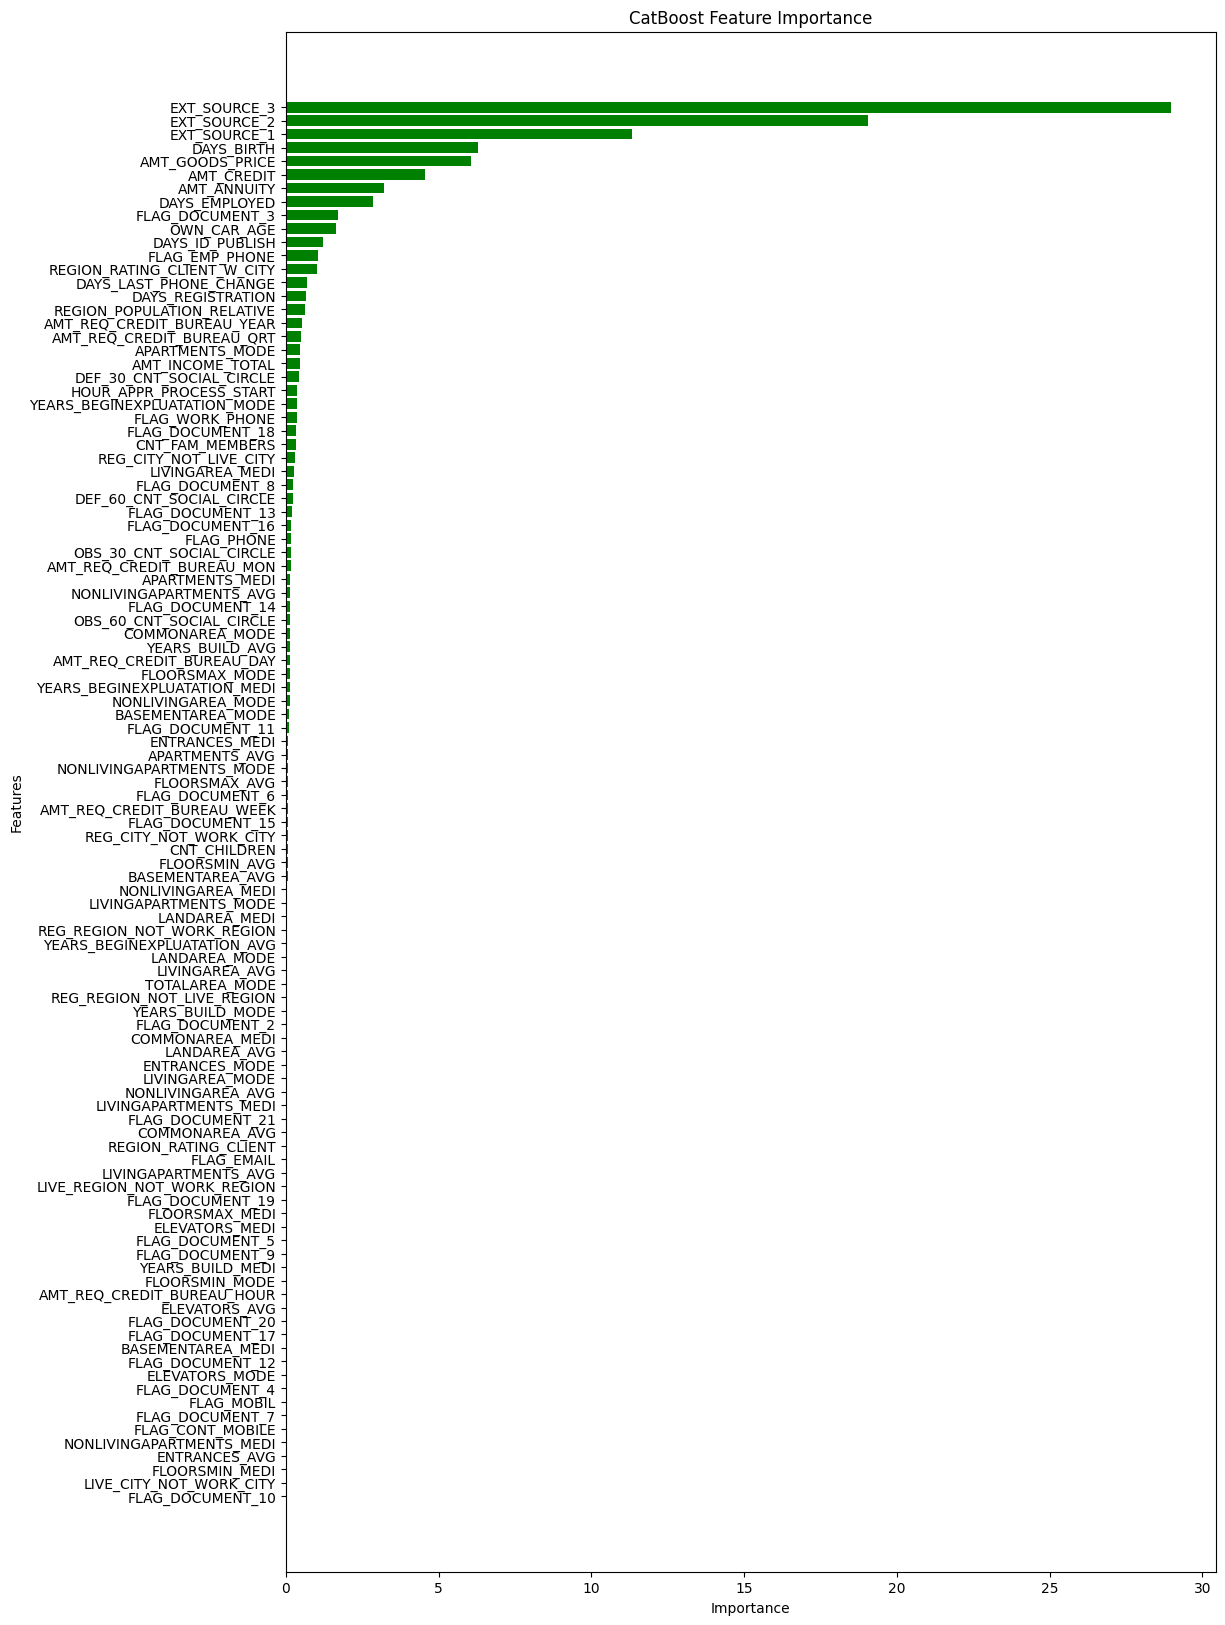

In [66]:
cat_model = CatBoostClassifier(silent=True, depth=2, iterations=1000,
                               learning_rate=0.1, loss_function='Logloss')
cat_model = cat_model.fit(x_train, y_train)

import_cat = cat_model.get_feature_importance()
feature_import_cat = pd.Series(import_cat, index=x_train.columns).sort_values()

plt.figure(figsize=(12, 20))
plt.barh(feature_import_cat.index, feature_import_cat.values,  color="g")
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [69]:
feature_import_new = feature_import_cat.index[47:]
cat_model = CatBoostClassifier(silent=True, depth=2, iterations=1000,
                               learning_rate=0.1, loss_function='Logloss')
cat_model.fit(x_train[feature_import_new], y_train, verbose=False)
y_cat = cat_model.predict_proba(x_test[feature_import_new])[:, 1]
print('score:', average_precision_score(y_test, y_cat))

score: 0.2324839464781279


**Точность** **немного** **поднялась**

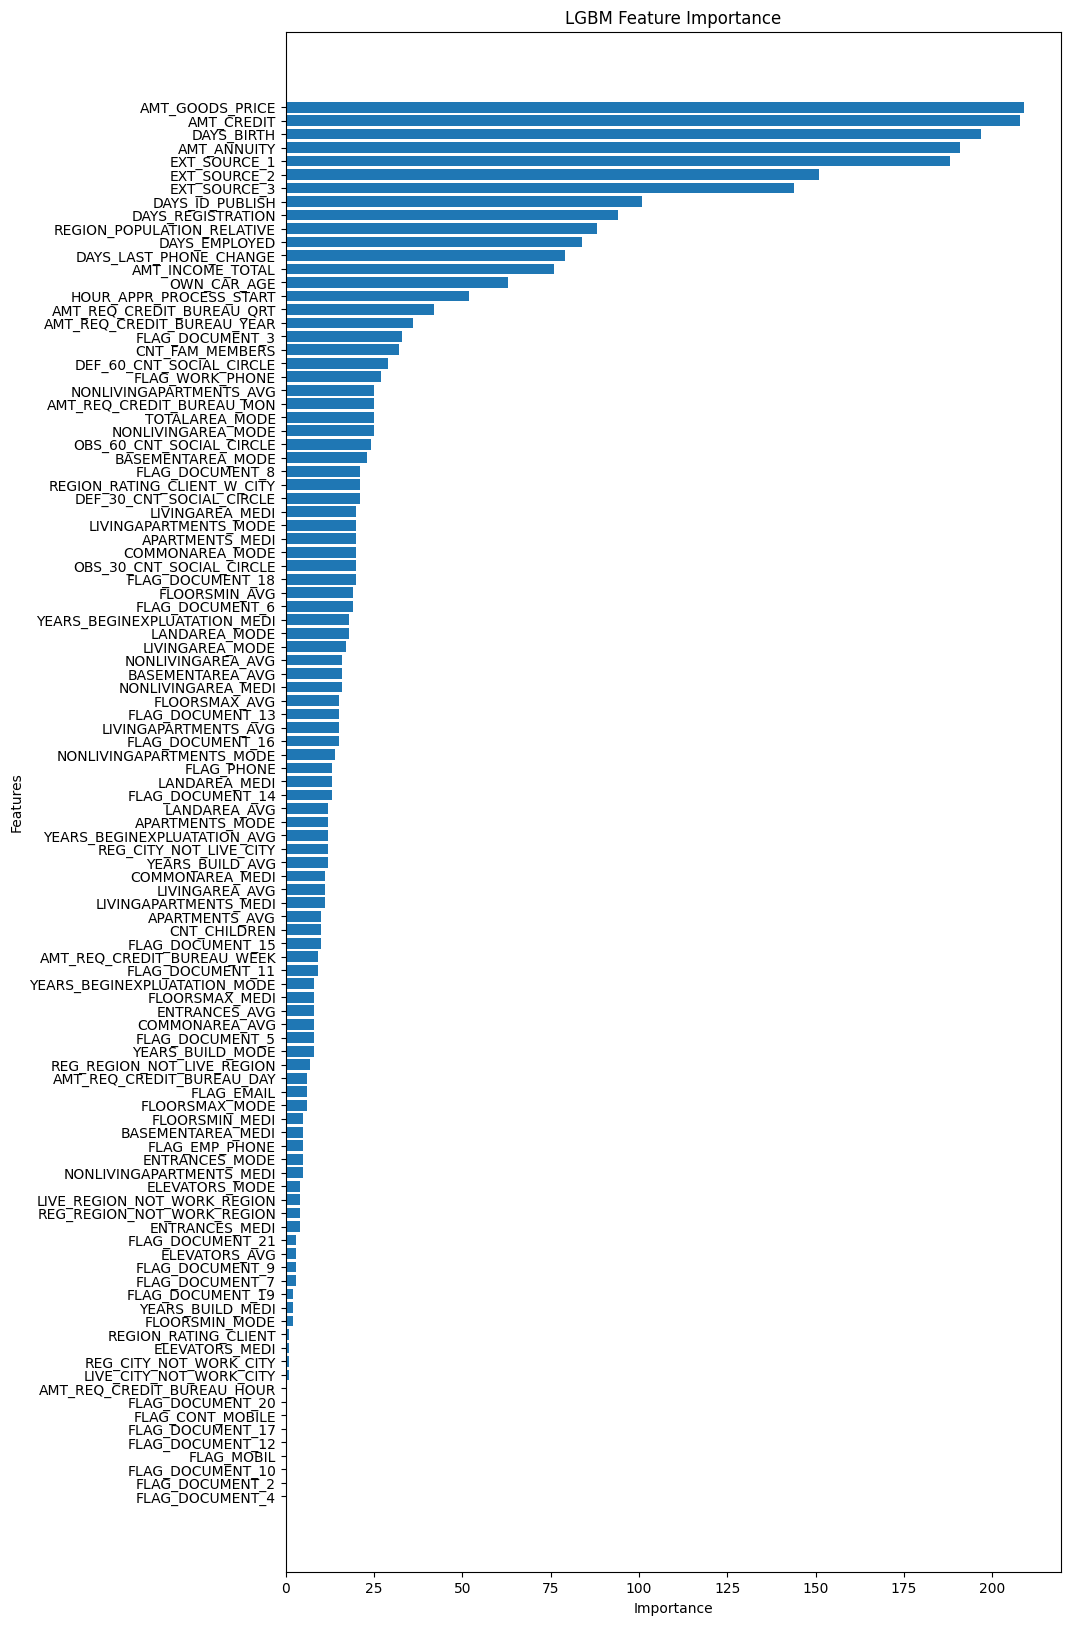

In [68]:
lgbm = LGBMClassifier(verbose=-1, learning_rate=0.1, max_depth=2, n_estimators=1000, objective='binary')
lgbm = lgbm.fit(x_train, y_train)

import_lgbm = lgbm.feature_importances_
feature_import_lgbm = pd.Series(import_lgbm, index=x_train.columns).sort_values()

plt.figure(figsize=(10, 20))
plt.barh(feature_import_lgbm.index, feature_import_lgbm.values)
plt.title('LGBM Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [71]:
feature_import_new = feature_import_lgbm.index[9:]
lgbm = LGBMClassifier(verbose=-1, learning_rate=0.1, max_depth=2,
                           n_estimators=1000, objective='binary')
lgbm.fit(x_train[feature_import_new], y_train)
y_lgbm = lgbm.predict_proba(x_test[feature_import_new])[:, 1]
print('score:', average_precision_score(y_test, y_cat))

score: 0.2324839464781279
